In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [20]:
image_size=150
batch_size=32
channels=3
epochs=20

In [21]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'Training',
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)


Found 3161 files belonging to 4 classes.


In [22]:
class_names=dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [23]:
len(dataset)

99

(32, 150, 150, 3)
[1 3 1 1 1 0 0 3 2 3 3 2 1 1 1 3 0 1 3 0 2 1 1 1 0 0 0 0 2 0 2 1]


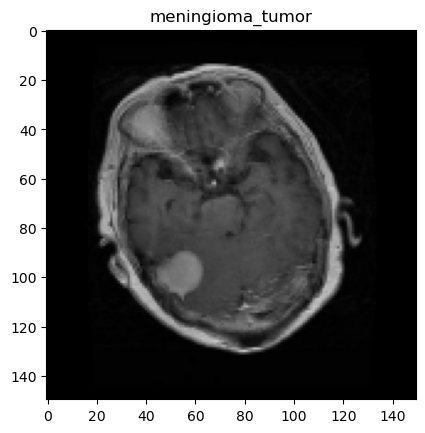

In [24]:
for image_batch,labels_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_names[labels_batch[0]])
  print(image_batch.shape)
  print(labels_batch.numpy())

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100):
  ds_size=len(dataset)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

79

In [28]:
len(val_ds)

9

In [29]:
len(test_ds)

11

In [30]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [32]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [33]:
input_shape = (image_size, image_size, channels)
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=epochs
)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.3079 - loss: 2.9721 - val_accuracy: 0.3021 - val_loss: 1.3392
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4575 - loss: 1.2231 - val_accuracy: 0.5660 - val_loss: 0.9563
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5918 - loss: 0.9377 - val_accuracy: 0.6493 - val_loss: 0.8213
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6369 - loss: 0.8313 - val_accuracy: 0.6771 - val_loss: 0.7526
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6984 - loss: 0.7111 - val_accuracy: 0.7083 - val_loss: 0.6513
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7145 - loss: 0.6365 - val_accuracy: 0.7500 - val_loss: 0.5705
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7624 - loss: 0.5833 - val_accuracy: 0.7986 - val_loss: 0.4943
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7842 - loss: 0.5279 - val_accuracy: 0.8472 - val_loss

In [37]:
scores = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.9760 - loss: 0.0434


In [38]:
scores

[0.0650535449385643, 0.9739130139350891]

In [39]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 79}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

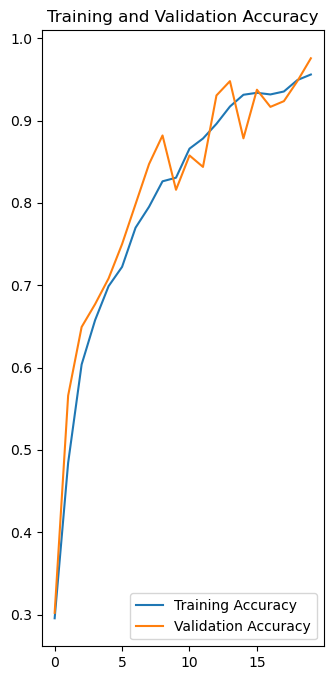

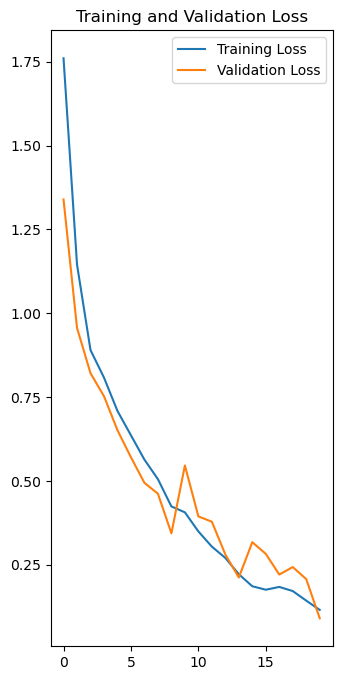

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range (epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range (epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
Actual Label: pituitary_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Predicted Label:  pituitary_tumor


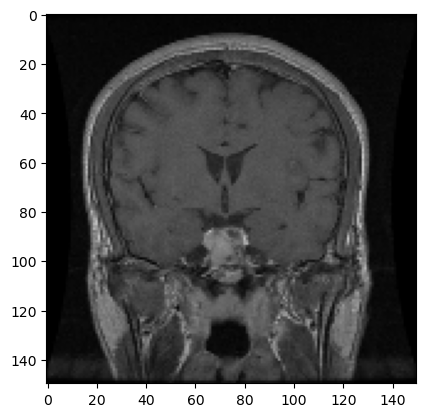

In [43]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8') 
    first_label = labels_batch[0].numpy() 
    
    print("first image to predict") 
    plt.imshow(first_image) 
    print("Actual Label:", class_names[first_label]) 
    
    batch_prediction = model.predict(images_batch) 
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) 
    img_array = tf.expand_dims(img_array, 0)  
    Predictions = model.predict(img_array)
    Predicted_class = class_names[np.argmax(Predictions[0])] 
    Confidence = round(100 * (np.max(Predictions[0])), 2) 
    return Predicted_class, Confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


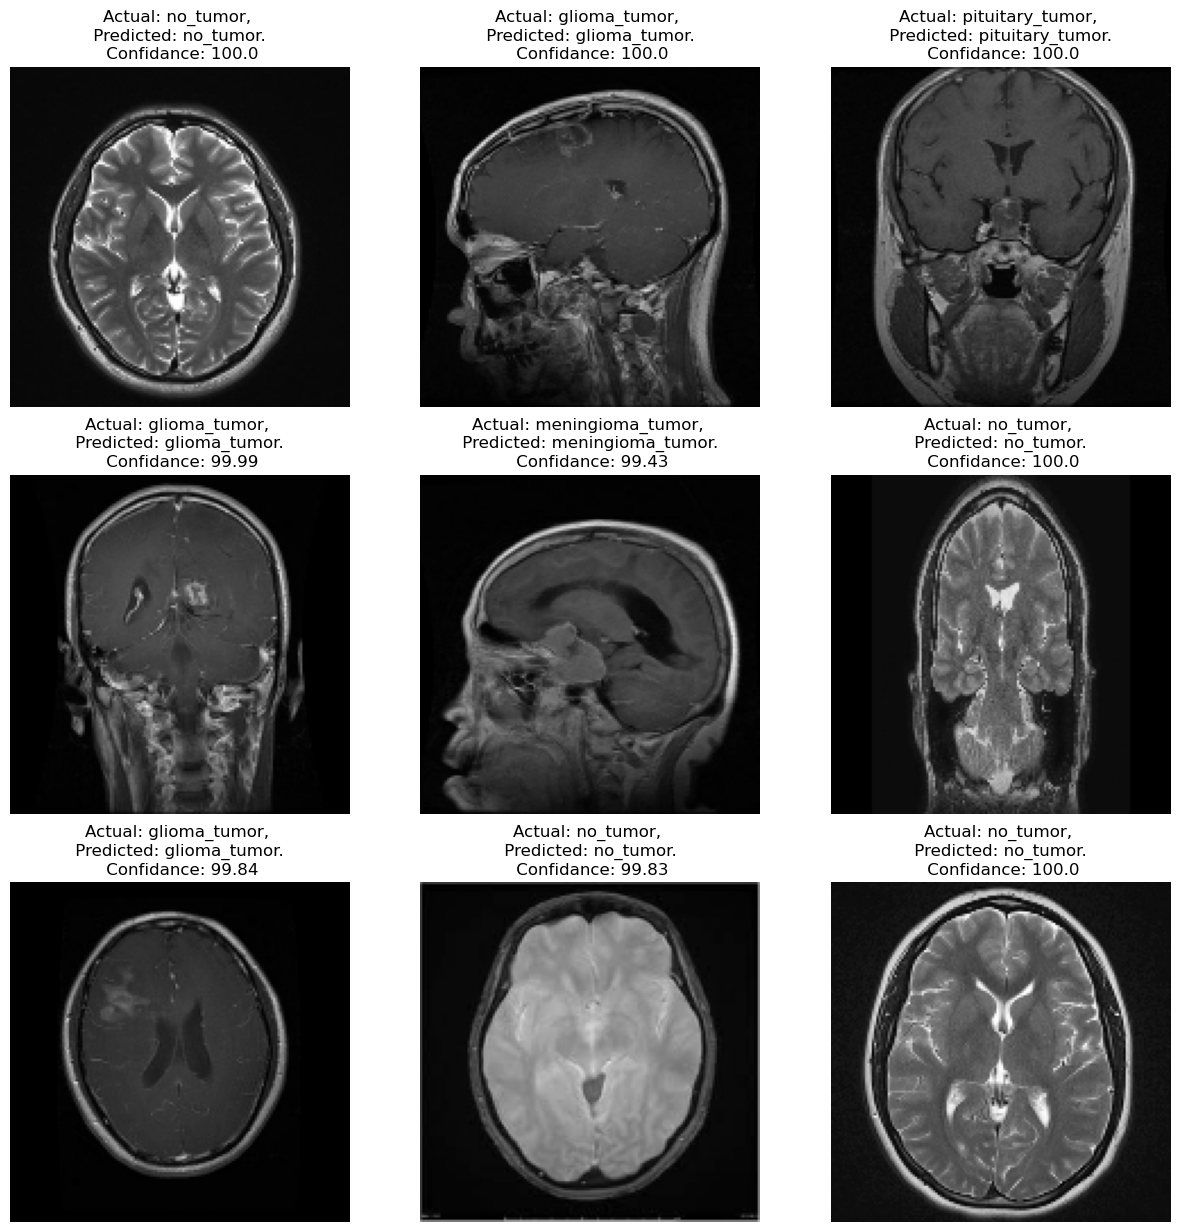

In [45]:
plt.figure(figsize=(15, 15)) 
for images, labels in test_ds.take(2): 
    for i in range(9):
        ax = plt.subplot(3, 3, i+ 1) 
        plt.imshow(images[i].numpy().astype("uint8")) 
        Predicted_class, Confidance = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {Predicted_class}. \n Confidance: {Confidance}" )
        plt.axis("off")

In [46]:
model_version = 1
model.save(f"Models/{model_version}.h5")

In [47]:
model_version = 1
model.save(f"Models/{model_version}.keras")

In [48]:
model_version = 1
model.export(f"Models/{model_version}")

INFO:tensorflow:Assets written to: Models/1\assets


INFO:tensorflow:Assets written to: Models/1\assets


Saved artifact at 'Models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2005843869520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005843866064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940366480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940367632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940367824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940368400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940368592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940369168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940369360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940369936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2005940370128: TensorSpec(shape=(), dty